<span style="font-size: 14pt">MIPT, TS forecasting in Retail, Autumn 2017</span>

<span style="font-size: 16pt"> Seminar #4: TS Forecasting in Retail

<span style="color:blue; font-size: 12pt">Alexey Romanenko </span>,
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'">alexromsput@gmail.com</span>

**Key words:** 
    - accuracy of forecast, train period, hold-out period, out-of-sample period (future period), restored demand, 
    intermittent demand models 

<h3> Plan </h3>
  * **HW2 solution** (20 minutes)
     
  * ** Accuracy of TS forecast, selecting model ** (40 minutes)
     - Loss Functions (reminder)
     - Using ML for selecting TS forecasting model
     - AIC, BIC for selecting TS Model
     
  * **TS Forecasting in Retail:** (20 minutes)</span> 
     - Restored Demand  
     - <span style="color:orange; font-size: 10pt">Intermittent Demand Forecasting </span> (self-study)
     - <span style="color:orange; font-size: 10pt"> Other TS forecasting methods </span> (self-study)

In [3]:
import numpy as np
from datetime import datetime, timedelta
import pylab
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import math
import pandas.tseries.offsets as ofs
import seaborn as sns
import warnings as w
from matplotlib import gridspec
import plotly.plotly as py

from IPython.display import Image

%matplotlib inline

<h1 align="center"> HW2 solution </h1>

<h1 align="center"> Accuracy of TS forecast, selecting model </h1>
# Loss Functions (reminder)

$$  SSE =\sum_{t=1}^T  \left({A_t-F_t}\right)^2 $$
$$  MSE =\frac{1}{T}\sum_{t=1}^T  \left({A_t-F_t}\right)^2 $$
$$  RMSE =\sqrt{\frac{1}{T}\sum_{t=1}^T  \left({A_t-F_t}{A_t}\right)} $$
$$  MAE =\frac{100}{T}\sum_{t=1}^T  \left|{A_t-F_t}\right| $$
$$  MAPE =\frac{1}{T}\sum_{t=1}^T  \left|\frac{A_t-F_t}{A_t}\right| $$
$$  MACAPE =\frac{2}{T}\sum_{t=1}^T  \left|\frac{A_t-F_t}{A_t+F_t}\right| $$
$$  MedianAE = Median \bigl(\left|A_1-F_1\right|,\dots,\left|A_T-F_T\right|\bigr) $$

In [4]:
# Quality functions
def qualitySSE(x,y):
    # Sum squared error
    # x,y - pandas structures
    # x - real values
    # y - forecasts
    return ((x-y)**2).sum(), (x-y)**2

def qualityMSE(x,y):
    # Mean squared error
    # x,y - pandas structures
    # x - real values
    # y - forecasts
    return ((x-y)**2).mean() , (x-y)**2

def qualityRMSE(x,y):
    # Root mean squared error
    # x,y - pandas structures
    # x - real values
    # y - forecasts
    return (((x-y)**2).mean())**(0.5) , (x-y)**2

def qualityMAE(x,y):
    # Mean absolute error
    # x,y - pandas structures
    # x - real values
    # y - forecasts
    return (x-y).abs().mean(), (x-y).abs()

def qualityMAPE(x,y):
    # Mean absolute percentage error
    # x,y - pandas structures
    # x - real values
    # y - forecasts
    qlt = ((x-y).abs()/x).replace([np.inf, -np.inf], np.nan)
    return qlt.mean() , (x-y).abs()

def qualityMACAPE(x,y):
    # Mean average corrected absolute percentage error
    # x,y - pandas structures
    # x - real values
    # y - forecasts
    qlt = (2*(x-y).abs()/(x+y)).replace([np.inf, -np.inf], np.nan)
    return qlt.mean() , (x-y).abs()

def qualityMedianAE(x,y):
    # Median absolute error
    # x,y - pandas structures
    # x - real values
    # y - forecasts
    return ((x-y).abs()).median(), (x-y).abs()

** Questions:**
   - When MACAPE is more appropriate loss function than MAPE?
   - Do you know other loss functions? When thay should be used?

# ML for selecting TS forecasting model

## General case in ML: train, validation and test samples

* В классическом ML делим всю выборку на 3 части:  learning sample (LS), validation set (VS) и test set (TS), например, в пропорции 50%, 25%, 25%)
<img src='./pic/TrainTestValidate.png'>

** Questions: ** 
   * Опишите последовательность использования этих sample для настройки финального алгоритма в классическом ML

** Ответ **
* настраиваем параметры моделей (fit models) на LS (using different learning algorithms or different complexity values)
* выбираем лучшую по точности на VS
* на выборке LS+VS настраиваем параметры лучшей модели
* оцениваем точность (assessment) модели на TS


### Двухшаговый CV
<img src='pic/TwoStageCV.png'>

** Question: **
    - Зачем нужен двух шаговый k-Fold? Иными словами, почему точность на CV2(VS) и на CV1(TS) будет отличаться?
     (см. ModelAssessment.ipnb)

## TS Forecasting: estimation period, Hold-out sample (validation period), out-of-sample (test period)

** Questions: ** 
    - Какие особенности разбиения обучающей выборки на train и test для данной задачи?
    - Что из себя представляет кросс-валидация при обучении алгоритмов TSF?

Типичное разбиение ВР на периоды:
<img src='pic/TS_EstimationTrainValidate.png', style="width: 800px; height: 500px">

Использование этих периодов для построения финальной модели:
<img src='pic/TS_train_test_validate.png'>

https://people.duke.edu/~rnau/three.htm

** При прогнозировании временных рядов (обычно):**
 * обучение на estimation period происходит 1-step-ahead
 * выбор наилучшей модели прогнозирования на validation period (hold-out sample) 1-step-ahead
 * оценка точности предсказания на test period (forecast to future, out-of-sample) происходит h-step-ahead
 
** Questions:**
  * В каких случаях классические подход к выбору моделей не подходит?
  * Какие есть другие вариант выбора моделей?
  
Example of selecting the best model from ES models see 
<span style="font-size: 12pt; font-family: 'Verdana'">Training ESM models on real Data set.ipnb

## Example of selecting ES models for real data
see <a href='https://github.com/ml-mipt/ml-mipt-part2/blob/master/2017/seminars/4_ts_retailTS/Training%20ESM%20models%20on%20real%20Data%20set.ipynb'>Training ESM models on real Data set.ipynb </a>

# AIC, BIC for selecting TS Model

AIC (Akaike Information Criterion)
###  $$ Q_\mu^{AIC}(X^\ell) = Q \bigl(\mu \left(X^\ell\right), X^{\ell} \bigr) + \frac{2 \hat\sigma^2}{\ell}\cdot d $$

BIC (Bayes Information Criterion)

###  $$ Q_\mu^{BIC}(X^\ell) = \frac{\ell}{\hat\sigma^2} Q \bigl(\mu \left(X^\ell\right), X^{\ell} \bigr) + \ln(\ell)\cdot d $$

HQIC (Hannan–Quinn information criterion)

###  $$ Q_\mu^{HQIC}(X^\ell) = \frac{\ell}{\hat\sigma^2} Q \bigl(\mu \left(X^\ell\right), X^{\ell} \bigr) + \ln\ln(\ell)\cdot d$$

Derivation of AIC, BIС see <a href='http://www.stat.cmu.edu/~larry/=stat705/Lecture16.pdf'>here</a>

<h1 align="center"> TS Forecasting in Retail  </h1> </h1>

In [10]:
# Нужно быть предельно внимательным с форматами дат!
sales_ts = pd.read_csv('./data/sales_4001.csv', sep=',', decimal='.')
sales_ts['Timestamp'] = pd.to_datetime(sales_ts[u'purchase_date'])
sales_ts = sales_ts.set_index(['Timestamp'], drop=True)
sales_ts.head()

,purchase_date,shop_id,product_id,price,quantity,price_after_discount
Timestamp,,,,,,
2013-01-02,2013-01-02,4001,4100024369,1480,1,1480.0
2013-01-02,2013-01-02,4001,4100024794,2807,1,2807.0
2013-01-02,2013-01-02,4001,4100028657,979,1,979.0
2013-01-02,2013-01-02,4001,4300000205,3319,1,3319.0
2013-01-02,2013-01-02,4001,4300007581,1899,1,1899.0


In [11]:
sales_ts.groupby(['shop_id', 'product_id']).count().sort_values(['quantity'], ascending=False)[:12]

purchase_date  price  quantity  price_after_discount
shop_id product_id                                                      
4001    4900001067            325    325       325                   325
        4900001052            299    299       299                   299
        4900001050            276    276       276                   276
        4100064977            236    236       236                   236
        4100064978            211    211       211                   211
        4900001047            210    210       210                   210
        4900000357            190    190       190                   190
        4900001025            134    134       134                   134
        4900001029            118    118       118                   118
        4900002005            108    108       108                   108
        4900002021            107    107       107                   107
        4900001031             78     78        78                    78

In [12]:
sales_ts.index.unique()

DatetimeIndex(['2013-01-02', '2013-01-03', '2013-01-04', '2013-01-05',
               '2013-01-06', '2013-01-07', '2013-01-08', '2013-01-09',
               '2013-01-10', '2013-01-11',
               ...
               '2016-10-11', '2016-10-12', '2016-10-13', '2016-10-14',
               '2016-10-15', '2016-10-16', '2016-10-17', '2016-10-18',
               '2016-10-19', '2016-10-20'],
              dtype='datetime64[ns]', name='Timestamp', length=1345, freq=None)

# Demand Extrapolation (восстановление спроса)
 * Theory: look file ML_IN_RETAIL.pptx <a href='https://github.com/ml-mipt/ml-mipt-part2/tree/master/2017/lectures'>here</a>  

In [15]:
inventory = pd.read_csv('./data/remains_4001.csv', sep=',', decimal='.')
inventory['Timestamp'] = pd.to_datetime(inventory[u'updated_at'])
inventory = inventory.set_index(['Timestamp'], drop=True)
inventory.head()

,shop_id,product_id,updated_at,quantity
Timestamp,,,,
2015-08-31,4001,4300059161,2015-08-31,0
2016-01-02,4001,4300059161,2016-01-02,0
2015-08-31,4001,4300059161,2015-08-31,1
2013-04-17,4001,4300051009,2013-04-17,1
2013-08-11,4001,4300051009,2013-08-11,0


In [21]:
# selas for one SKU
product_id = 4900001067
inventory[(inventory['product_id']==product_id)]

,shop_id,product_id,updated_at,quantity
Timestamp,,,,
2015-12-12,4001,4900001067,2015-12-12,5
2015-09-03,4001,4900001067,2015-09-03,0
2015-08-31,4001,4900001067,2015-08-31,33
2016-06-05,4001,4900001067,2016-06-05,0


In [22]:
# суммарные продажи
# sales_ts[sales_ts['product_id']==product_id]['quantity'].sum()
agg_sales_ts = sales_ts.reset_index(level=0).reset_index(level=0).groupby(['Timestamp','product_id']).agg({'quantity' : np.sum,
        'price' : np.mean,
        'price_after_discount' :[np.min, np.max, np.mean]})
qty_ts = agg_sales_ts['quantity'].reset_index(level=1).rename(columns={'sum':'sales'})
qty_ts.head()

,product_id,sales
Timestamp,,
2013-01-02,4100024369,1
2013-01-02,4100024794,1
2013-01-02,4100028657,1
2013-01-02,4300000205,1
2013-01-02,4300007581,1


In [23]:
iv_ts = inventory[inventory['product_id']==product_id].reset_index(level=0).groupby('Timestamp').agg({'quantity' : np.max,}).rename(columns={'quantity':'inventory'})
iv_ts.head()

,inventory
Timestamp,
2015-08-31,33
2015-09-03,0
2015-12-12,5
2016-06-05,0


In [24]:
# дополним пропущенные значения
iv_ts= iv_ts.reindex(pd.date_range(np.min(iv_ts.index),np.max(iv_ts.index))).fillna(method = 'ffill')
iv_ts.head()

,inventory
2015-08-31,33.0
2015-09-01,33.0
2015-09-02,33.0
2015-09-03,0.0
2015-09-04,0.0


In [25]:
# объединим продажи и остатки
iv_sales=qty_ts[qty_ts['product_id']==product_id].merge(iv_ts, how='right', left_index=True, right_index = True)
iv_sales['sales'].fillna(0,inplace=True)
iv_sales['product_id'].fillna(method='ffill',inplace=True)
iv_sales.head()

,product_id,sales,inventory
2015-08-31,NaN,0.0,33.0
2015-09-01,NaN,0.0,33.0
2015-09-02,NaN,0.0,33.0
2015-09-03,4.900001e+09,1.0,0.0
2015-09-04,4.900001e+09,0.0,0.0


In [28]:
# даты, когда не было дефицита
idx = iv_sales['inventory']>iv_sales['sales']
non_zero_idx = (iv_sales['inventory']>0)|(iv_sales['sales']>0)

In [29]:
# даты, когда был дефицит
iv_sales[(~idx)]

,product_id,sales,inventory
2015-09-03,4.900001e+09,1.0,0.0
2015-09-04,4.900001e+09,0.0,0.0
2015-09-05,4.900001e+09,1.0,0.0
2015-09-06,4.900001e+09,0.0,0.0
2015-09-07,4.900001e+09,0.0,0.0
2015-09-08,4.900001e+09,1.0,0.0
2015-09-09,4.900001e+09,0.0,0.0
2015-09-10,4.900001e+09,0.0,0.0
2015-09-11,4.900001e+09,1.0,0.0
2015-09-12,4.900001e+09,0.0,0.0


In [32]:
# пример расчёта интенсивности спроса согласно модели Пуассона
sum_k = iv_sales['sales'].sum() # суммарное количество продаж
n_0 = iv_sales['sales'][idx].count() # количество дней, когда продажи были меньше остатка
n_m = iv_sales['sales'][(~idx)&non_zero_idx].count() # количество дней, когда весь товар был распродан

print('sum_k: ', sum_k)
print('n_0: ', n_0)
print('n_m: ', n_m)

sum_k:  48.0
n_0:  179
n_m:  32


In [33]:
alpha=0.25 # estimtion: alpha = lambda
LAMBDA = sum_k/(n_0+alpha*n_m)

print('LAMBDA:', LAMBDA)
print('MEAN:', iv_sales['sales'][idx].mean())

LAMBDA: 0.256684491979
MEAN: 0.0782122905027933


In [34]:
print('Суммарно за полтора года')
print('MEETED DEMAND: ', sum_k)
print('LOST DEMAND: ', LAMBDA*n_m)
print('LOST DEMAND: ', LAMBDA*n_m/sum_k*100, '%')

Суммарно за полтора года
MEETED DEMAND:  48.0
LOST DEMAND:  8.21390374332
LOST DEMAND:  17.1122994652 %


In [38]:
# по всем товарам
lambda_values = pd.DataFrame(index = sales_ts['product_id'].unique(), columns = ['LAMBDA','k', 'n_0', 'n_m'])
for pr in sales_ts['product_id'].unique():
    iv_ts = inventory[inventory['product_id']==pr].reset_index(level=0).groupby('Timestamp').agg({'quantity' : np.max,}).rename(columns={'quantity':'inventory'})
    if iv_ts.shape[0]>0:
        iv_ts= iv_ts.reindex(pd.date_range(np.min(iv_ts.index),np.max(iv_ts.index))).fillna(method = 'ffill')

        iv_sales=qty_ts[qty_ts['product_id']==product_id].merge(iv_ts, how='right', left_index=True, right_index = True)
        iv_sales['sales'].fillna(0,inplace=True)
        iv_sales['product_id'].fillna(method='ffill',inplace=True)

        idx = iv_sales['inventory']>iv_sales['sales']
        non_zero_idx = (iv_sales['inventory']>0)|(iv_sales['sales']>0)

        sum_k = iv_sales['sales'].sum()
        n_0 = iv_sales['sales'][idx].count()
        n_m = iv_sales['sales'][(~idx)&non_zero_idx].count()

        alpha=0.01
        LAMBDA = sum_k/(n_0+alpha*n_m)
        LAMBDA = sum_k/(n_0+0.5*LAMBDA*n_m)
        lambda_values.loc[pr][['LAMBDA','k', 'n_0', 'n_m']]=[LAMBDA, sum_k, n_0, n_m]

C:\Users\rusrom.EUROPE\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning:

invalid value encountered in double_scalars



In [271]:
lambda_values

,LAMBDA,k,n_0,n_m
4100024369,0.02,1,0,1
4100024794,0,0,1,0
4100028657,0.333068,23,65,23
4300000205,NaN,0,0,0
4300007581,NaN,0,0,0
4300044415,0,0,1,0
4300058500,0.197637,54,268,52
4300059381,NaN,0,0,0
4100015902,0.02,1,0,1
4100024220,0.236812,14,59,1


In [ ]:
# Practice: extrapolate demand for all products


In [ ]:
# compare volume of restored demand and sales

## Intermittent Demand (модели прогнозирования спорадического спроса) (self-study)

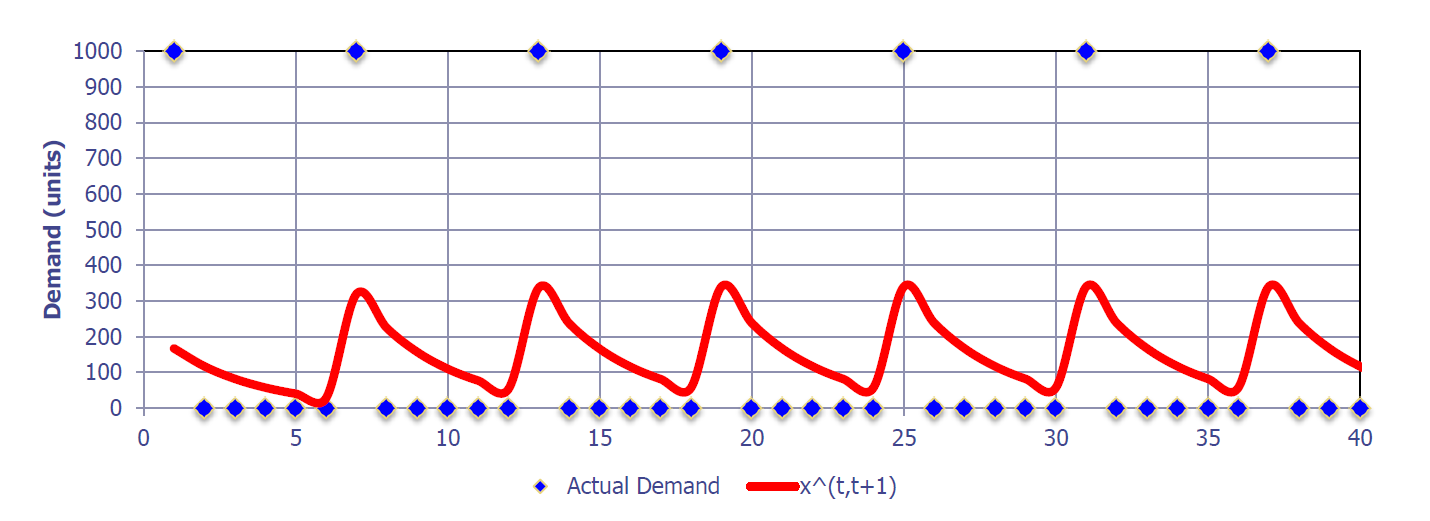

In [133]:
# пример спорадического спроса
Image('pic/IntermittentExample.png')

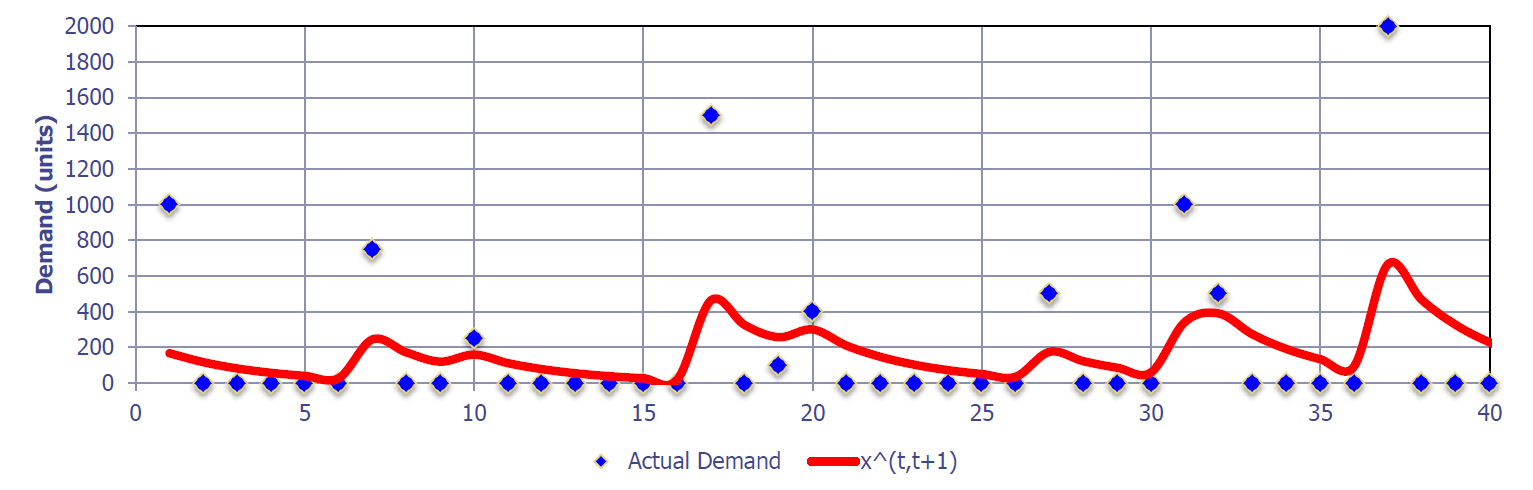

In [134]:
# пример спорадического спроса
Image('pic/IntermittentExample2.png')

** Модель временного ряда **
$$ y_t = x_t\cdot z_t$$

   - $x_t$ - вероятность возникновения НЕнулевого спроса
       $$
           x_t=\begin{cases}1, & \text{с вероястностью } \frac{1}{n}\\ 0, & \text{с вероястностью } 1 -\frac{1}{n} \end{cases}
       $$
       
   - $z_t$ - средняя величина спроса (в случае, если спрос возник) 

### Модель Кростона

* Предсказывает отдельно частоту (интервал между событиями возникновения спроса) и отдельно объем спроса
* Исходный ВР делится на объёма спроса (если спрос случился) и на длину интервала появления спроса
* Прогноз: среднее значение спроса в единицу времени

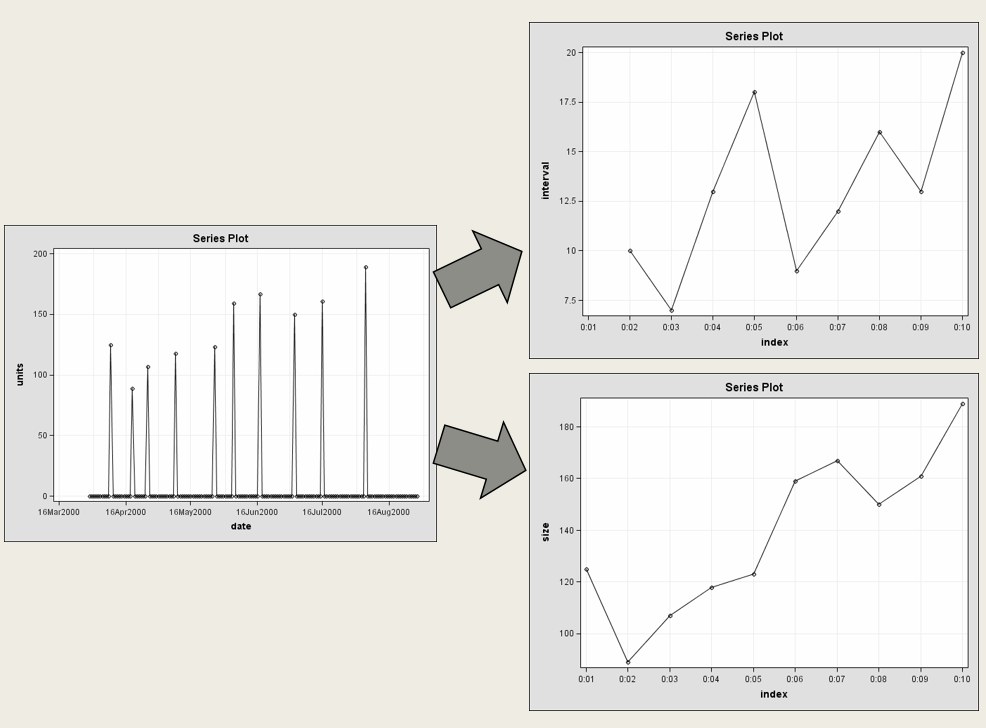

In [9]:
Image('pic/CrostonIdea.png', width=800, height=800)

** Прогнозирование спроса **

$$ \hat{y}_{t+1}=z_t/\hat{n}_t$$
где
$$ z_t = \begin{cases}z_{t-1}, & y_t==0 \\ \alpha\cdot{y_t}+(1-\alpha) z_{t-1}, & y_t <>0 \end{cases}$$

$$ \hat{n}_t = \begin{cases}\hat{n}_t, & y_t==0 \\ \beta\cdot{\color{red}{n_t}}+(1-\beta) \hat{n}_{t-1}, & y_t <>0 \end{cases}$$

$\alpha$ - параметр сглаживания величины спроса
$\beta$ - параметр для сглаживания частоты возникнования спроса



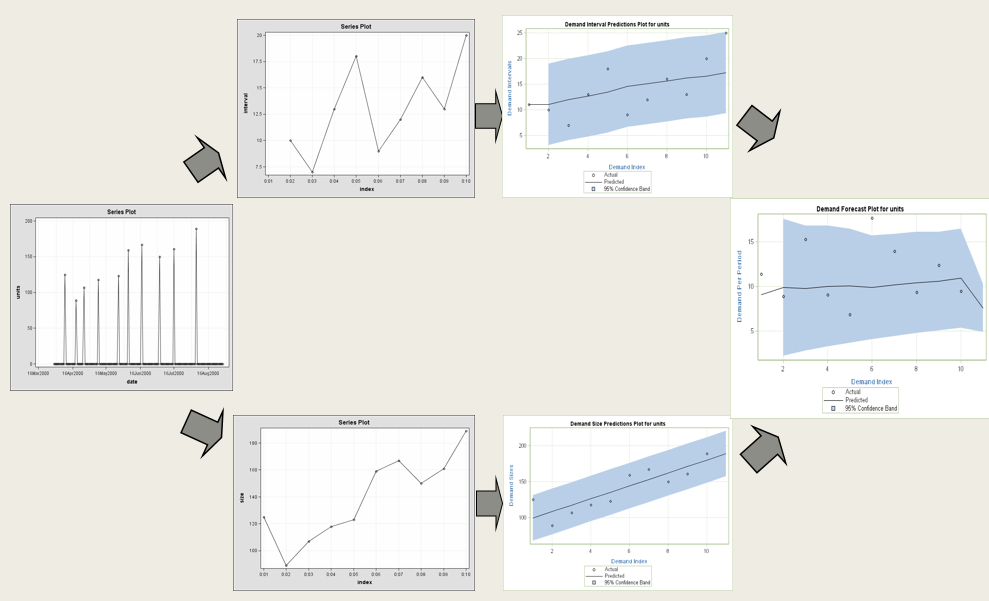

In [136]:
Image('pic/CrostonIdea2.png')

In [ ]:
# Practice: realize Croston Algorithm


# Other TS forecasting methods (self-study)

* Dynamic Autoregressive models
* ARCH, GARCH, EGARCH ...
* VAR (vector autoregression)
* Gaussian State Space Models (UCM)
* GAS, GASX (generalized autoregression)
* Гусеница [Голяндина, 2003]

* Time series forecasting in Python
    - http://www.statsmodels.org/stable/
    - http://www.pyflux.com/
    - http://rpy2.bitbucket.org/

<h1 align="center"> Conclusion </h1>

** you can find HW3 here** 
  * оцените <a href="https://goo.gl/forms/SIa0Elv5PrrEnwwa2"> семинар </a>